<a href="https://colab.research.google.com/github/kwojtylko/flat_price_estimator/blob/main/3_model_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import bibliotek
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import collections

In [ ]:
# wczytywanie danych
gratka_df = pd.read_csv("gratka_dane_model.csv")
gratka_df

,url_base,url_page,page,location,title,link,description,area_m2,n_rooms,n_floor,price_per_m2,district
0,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,"Kraków, ...","Nowe mieszkanie Kraków Krowodrza, ul. Pod Fortem",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Poznajcie bliżej naszą inwestycję – Krowodrza ...,44.93,2,7.0,10700,Krowodrza
1,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,"Kraków, ...","Nowe mieszkanie Kraków Podgórze, ul. Golikówka",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Kukla Nieruchomości prezentujeMieszkanie 2- po...,42.00,2,1.0,7024,Podgórze
2,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,"Kraków, ...","Nowe mieszkanie Kraków Krowodrza, ul. Pod Fortem",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Poznajcie bliżej naszą inwestycję – Krowodrza ...,59.15,3,1.0,9400,Krowodrza
3,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,"Kraków, ...","Nowe mieszkanie Kraków Krowodrza, ul. Pod Fortem",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Poznajcie bliżej naszą inwestycję – Krowodrza ...,50.56,2,7.0,10300,Krowodrza
4,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,1,"Kraków, ...","Nowe mieszkanie Kraków Krowodrza, ul. Pod Fortem",https://gratka.pl/nieruchomosci/nowe-mieszkani...,Poznajcie bliżej naszą inwestycję – Krowodrza ...,76.35,4,6.0,9700,Krowodrza
...,...,...,...,...,...,...,...,...,...,...,...,...
3476,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,110,"Kraków, ...","Nowe mieszkanie Kraków Płaszów, ul. Myśliwska",https://gratka.pl/nieruchomosci/nowe-mieszkani...,W budynkach Myśliwska Solar Garden w Krakowie-...,42.22,2,0.0,9995,Płaszów
3477,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,110,"Kraków, ...","Nowe mieszkanie Kraków Płaszów, ul. Myśliwska",https://gratka.pl/nieruchomosci/nowe-mieszkani...,W budynkach Myśliwska Solar Garden w Krakowie-...,67.07,3,1.0,8916,Płaszów
3478,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,110,"Kraków, ...","Nowe mieszkanie Kraków Płaszów, ul. Myśliwska",https://gratka.pl/nieruchomosci/nowe-mieszkani...,W budynkach Myśliwska Solar Garden w Krakowie-...,63.05,3,1.0,9056,Płaszów
3479,https://gratka.pl/nieruchomosci/mieszkania/kra...,https://gratka.pl/nieruchomosci/mieszkania/kra...,110,"Kraków, ...","Nowe mieszkanie Kraków Płaszów, ul. Myśliwska",https://gratka.pl/nieruchomosci/nowe-mieszkani...,W budynkach Myśliwska Solar Garden w Krakowie-...,62.59,3,0.0,9394,Płaszów


In [ ]:
#zdefiniownie cech do modelu
model_col = ["area_m2", "n_rooms", "n_floor", "district", "price_per_m2"]
model_df = gratka_df[model_col]
model_df

,area_m2,n_rooms,n_floor,district,price_per_m2
0,44.93,2,7.0,Krowodrza,10700
1,42.00,2,1.0,Podgórze,7024
2,59.15,3,1.0,Krowodrza,9400
3,50.56,2,7.0,Krowodrza,10300
4,76.35,4,6.0,Krowodrza,9700
...,...,...,...,...,...
3476,42.22,2,0.0,Płaszów,9995
3477,67.07,3,1.0,Płaszów,8916
3478,63.05,3,1.0,Płaszów,9056
3479,62.59,3,0.0,Płaszów,9394


In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_m2       3481 non-null   float64
 1   n_rooms       3481 non-null   int64  
 2   n_floor       3481 non-null   float64
 3   district      2918 non-null   object 
 4   price_per_m2  3481 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 136.1+ KB


In [ ]:
model_df.describe()

,area_m2,n_rooms,n_floor,price_per_m2
count,3481.000000,3481.000000,3481.000000,3481.000000
mean,55.448914,2.559609,2.392129,10631.935363
std,26.350922,1.027479,2.197552,2941.337028
min,13.300000,1.000000,0.000000,4999.000000
25%,39.000000,2.000000,1.000000,8893.000000
50%,51.080000,3.000000,2.000000,9940.000000
75%,66.110000,3.000000,4.000000,11955.000000
max,230.000000,6.000000,14.000000,40000.000000


In [ ]:
#sprawdzenie braków w danych
model_df.isna().sum()

area_m2           0
n_rooms           0
n_floor           0
district        563
price_per_m2      0
dtype: int64

In [ ]:
#uzupełnianie braków
model_df["district"].fillna("brak", inplace=True)
model_df.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


area_m2         0
n_rooms         0
n_floor         0
district        0
price_per_m2    0
dtype: int64

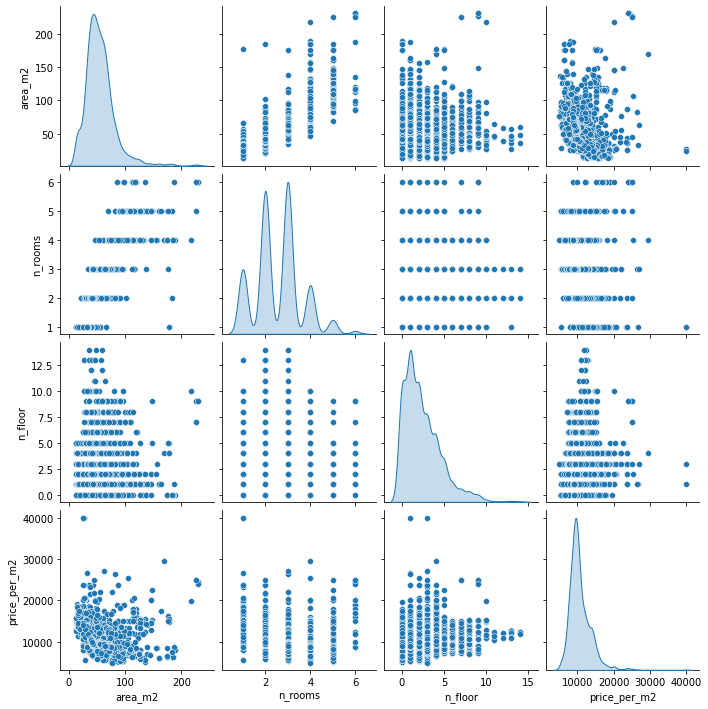

In [ ]:
# wykres zależności między cechami
sns.pairplot(model_df, diag_kind="kde");

In [ ]:
px.box(model_df, x = "area_m2", title = "Rozrzut cechy - powierzchnia", orientation = "h")

In [ ]:
px.box(model_df, x = "n_rooms", title = "Rozrzut cechy - liczba pokoi- NIECZYTELNY", orientation = "h")

In [ ]:
px.box(model_df, x = "n_floor", title = "Rozrzut cechy - nr piętra- NIECZYTELNY", orientation = "h")

In [ ]:
px.box(model_df, x = "price_per_m2", title = "Rozrzut cechy - cena", orientation = "h")

In [ ]:
px.scatter(model_df, x = "price_per_m2", title = "Rozrzut cechy - cena")

In [ ]:
px.scatter(model_df, x = "area_m2", title = "Rozrzut cechy - powierzchnia")

In [ ]:
px.scatter(model_df, x = "n_rooms", title = "Rozrzut cechy - cena")

In [ ]:
px.scatter(model_df, x = "n_floor", title = "Rozrzut cechy - cena")